# Estimating gas fluxes from soil using automatic chambers without recirculation

This text will explain in principle a method to estimate gas fluxes from soil using automatic chambers. To make things concrete, here we assume the gas is $\textrm{N}_2\textrm{O}$, but in principle it does matter what gas it is, provided only that inside the chamber it is unreactive on the time scale of the measurement, so that a simple mass conservation can be assumed: input = output + accumulation.

## Experimental setup and assumptions

- The chamber has a known volume $V$ and covers a known area $A$ of the soil.
- Outside the chamber, the concentration (volumetric fraction) of $\textrm{N}_2\textrm{O}$ is constant $c_0$.
- When the chamber is open, its contents mixes with the ambient air so that inside the open chamber we also have concentration $c_0$.
- When the chamber is closed, the concentration of $\textrm{N}_2\textrm{O}$ will start to change. The air inside the chamber is well mixed so that there is a uniform  concentration $c(t)$ throughout the chamber.
- From the chamber our measurement apparatus is drawing a known constant volumetric gas flow $Q$, periodically analyzing its concentration (volumetric fraction) of $\textrm{N}_2\textrm{O}$.
- There is an inlet hole in the chamber where air can enter when the chamber is closed. When the chamber is closed, this volumetric flow is $Q'$ and has concentration $c_0$, like the ambient air.
- From the soil below the chamber, there is a constant volumetric net flux $F$ of $\textrm{N}_2\textrm{O}$ from the soil to the chamber. (The flux may also be negative, i.e., having net direction from the chamber to the soil.)
- There may also be exchange of other gases between the soil and the chamber, but the net size of these exchanges is small compared to $Q$, so that $Q' \approx Q$. In other words, practically the whole flow of air drawn into the chamber comes from the ambient atmosphere, not the soil.



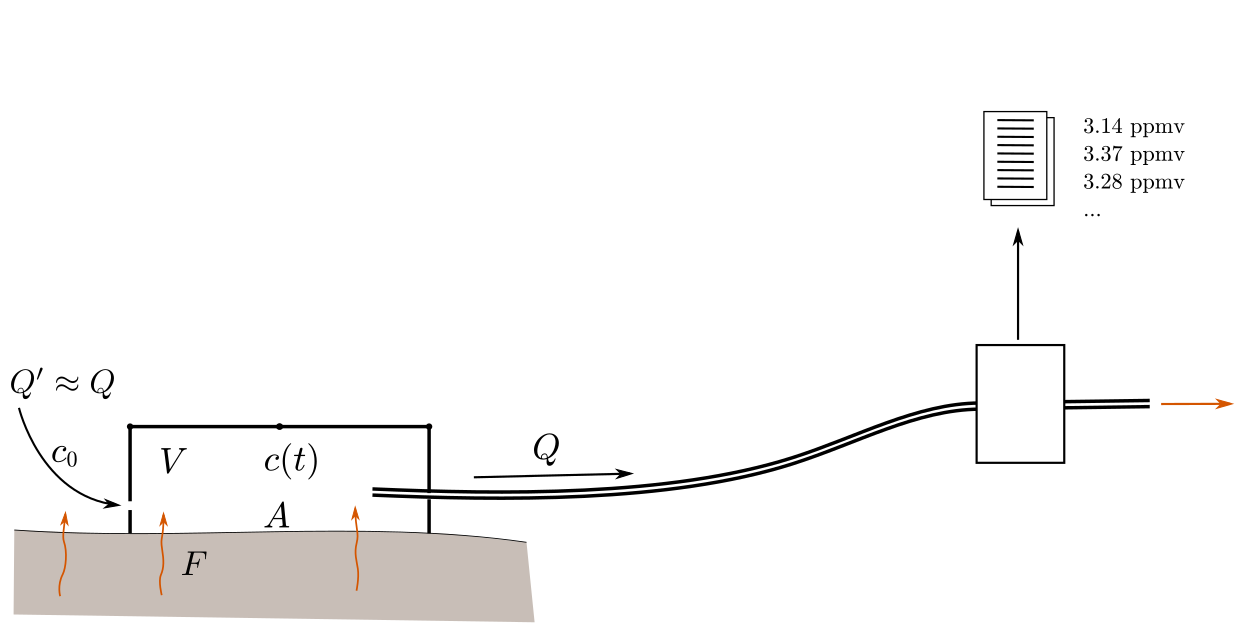

In [1]:
import IPython
IPython.display.Image("no-recirculation-illustration-2.png")



## Dimensions and units

These are the dimensions of the involved variables:

| **Variable** | **Dimension**                     | **Unit example**          |
|--------------|-----------------------------------|---------------------------|
| $V$          | $\textrm{length}^3$               | $\textrm{m}^3$            |
| $A$          | $\textrm{length}^2$               | $\textrm{m}^2$            |
| $c_0, c(t)$  | Dimensionless (volume / volume)   | ppmv                      |
| $Q, Q'$      | $\textrm{length}^3/\textrm{time}$ | $\textrm{m}^3/\textrm{s}$ |
| $F$          | $\textrm{length}/\textrm{time}$   | $\textrm{m/s}$            |

## The development of $c(t)$ after closing

Assume that the chamber closes at a time $t_0$. When the chamber closes, the concentration is $c(t_0) = c_0$. If the soil flux $F$ is nonzero, $c(t)$ will then change. The theoretical concentration profile can be derived using a mass balance:

$$
\textrm{input} = \textrm{output} + \text{accumulation}
$$

$$
Q' c_0 + F A = Q c(t) + V \frac{\textrm{d}c}{\textrm{d}t}
$$

Approximate $Q'$ = $Q$ and rearrange to find

$$
\frac{\textrm{d}c}{\textrm{d}t} = \frac{Q}{V} (c_0 - c(t)) + F \frac{A}{V}
$$

This is a [separable, first-order ordinary differential equation](https://en.wikipedia.org/wiki/Examples_of_differential_equations#Separable_first-order_ordinary_differential_equations). Solving it and enforcing the initial condition $c(t_0) = c_0$, the solution is:
$$
c(t) = c_0 + F\frac{A}{Q} \left( 1 - e^{-\frac{Q}{V}(t-t_0)} \right)
$$

Note that in this equation, the three parameters $A$, $V$ and $Q$ have one degree of freedom in the sense that any change to one of them can be counteracted by changing the other two. For example, doubling the volume $V$, the flow $Q$ and the area $A$ will in theory lead to exactly the same concentration profile.

The problem can be reformulated without this degree of freedom by defining the parameters $h = V/A$ and $\tau=V/Q$. The parameter $h$ can be called the equivalent height, since it is also the actual height of the chamber if it is, e.g., a box or a cylinder. The parameter $\tau$ is a time constant, equal to time it takes the flow $Q$ to empty the volume $V$. Noting that $A/Q = \tau/h$, we find

$$
c(t) = c_0 + F\frac{\tau}{h} \left( 1 - e^{-(t-t_0)/\tau} \right)
$$


| **Variable** | **Dimension**                   | **Unit example** |
|--------------|---------------------------------|------------------|
| $h$          | $\textrm{length}$               | $\textrm{m}$     |
| $\tau$       | $\textrm{time}$                 | $\textrm{s}$     |
| $c_0, c(t)$  | Dimensionless (volume / volume) | $\textrm{ppmv}$  |
| $F$          | $\textrm{length}/\textrm{time}$ | $\textrm{m/s}$   |


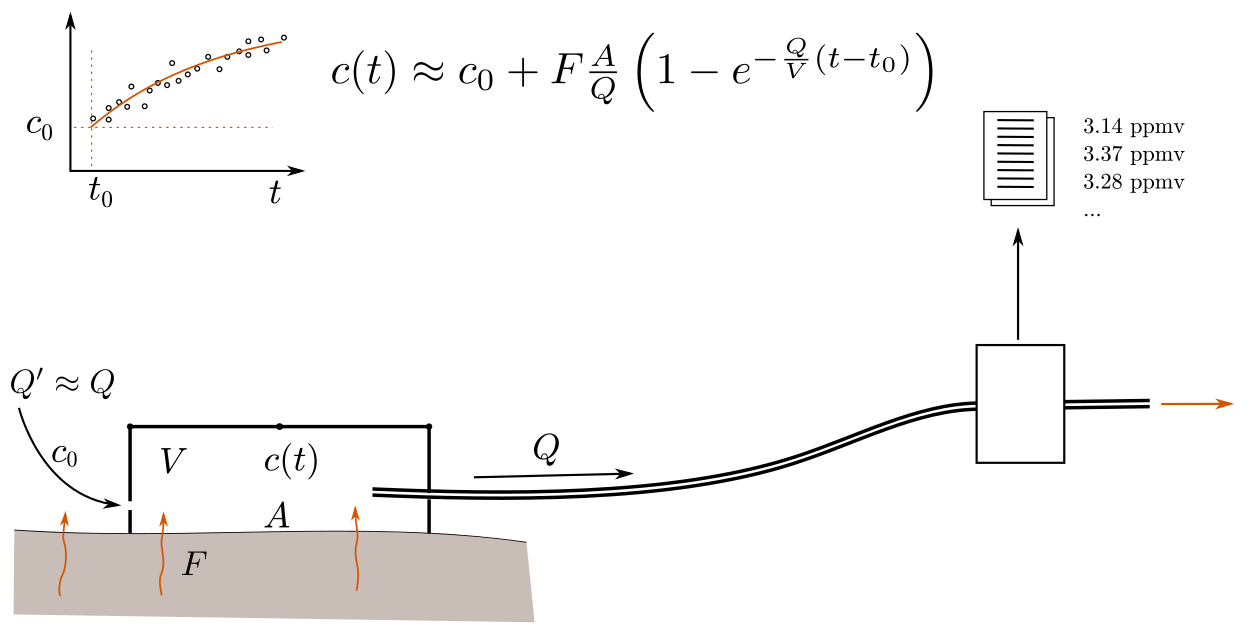

In [2]:
IPython.display.Image("no-recirculation-illustration-3.png")



## Estimating $F$ from measurement data

Note that the equation above can be expressed as
$$
c(t) = c_0 + F g(t),
$$
where $g(t) = \frac{\tau}{h} \left( 1 - e^{-(t-t_0)/\tau} \right)$.

Assuming that we have at least two analyzed values of $c(t)$, and we know the values of $h$, $\tau$, and $t_0$, we can therefore find $F$ using linear regression as follows. For each value $c(t)$, calculate the corresponding $g(t)$. Then estimate the linear regression model
$$
c(t) \sim b_0 + b_1 g(t).
$$
The regression coefficient $b_1$ is now an estimate of $F$. (And $b_0$ is an estimate of $c_0$, but we don't need it, and in practice there are obviously much better ways to estimate $c_0$ given the equipment assumed above!)


## Converting $F$ from volumetric to molar flux

So far it is assumed that concentrations and flows are measured in volumetric units. Assuming at temperature $T$ and pressure $P$ in the chamber, the molar flux $F_\textrm{molar}$ can be estimated from the volumetric flux $F$ using the ideal gas law:
$$
F_\textrm{molar} = \frac{P F}{R T},
$$
where $R$ is the ideal gas constant.


## Critical assessment of the assumptions

A number of assumptions went into this calculation. All of them can and should be considered carefully.

- The equivalent height $h=A/V$ needs to be known. In terms of the differential equation solution above, a decrease in $h$ has exactly the same effect as an increase in $F$. Therefore, if we for example overestimate $h$ by 1%, then $F$ will be overestimated by the same amount.
- The time constant $\tau$. It should be constant and needs to be known. In practice this means that both $V$ and $Q$ need to be known and constant. The larger $\tau$ is compared to the closure time, the lower is the sensitivity to a relative error in $\tau$. For example, in our case $\tau$ is about 200 minutes, compared to a closure time of 20 minutes, and in this case an error of 20% in $\tau$ only causes an error of about 2% in F.
- The concentration $c_0$. In the derivation, what matters is (1) that the inflow $Q'$ has a constant concentration $c_0$ and (2) that this concentration is equal to the initial concentration inside the chamber just after closing. This assumption could be violated, for example, if the air inside the chamber is not well mixed with the ambient air just before closing.
- Uniform concentration $c(t)$ inside the chamber. We can hope that the flow of sampled air will cause sufficient mixing, or a fan or other mixing device can be installed in the chamber.
- The gas flux $F$ from the soil being constant. If we have multiple analysis values during the chamber closure, some fluctuations up and down will likely not have a strong effect on the results. However, if there is a clear trend in $F$ during the closure (e.g., because the chamber closure itself is affecting the processes causing the emission flux $F$), then this will lead to biased estimates of $F$.

## Simulation to demonstrate the method

Simulated experiments can be a very efficient way to develop understanding of the estimation method and the effect of various possible problems. Here is a Python code that can be used as a basis for further exploration.

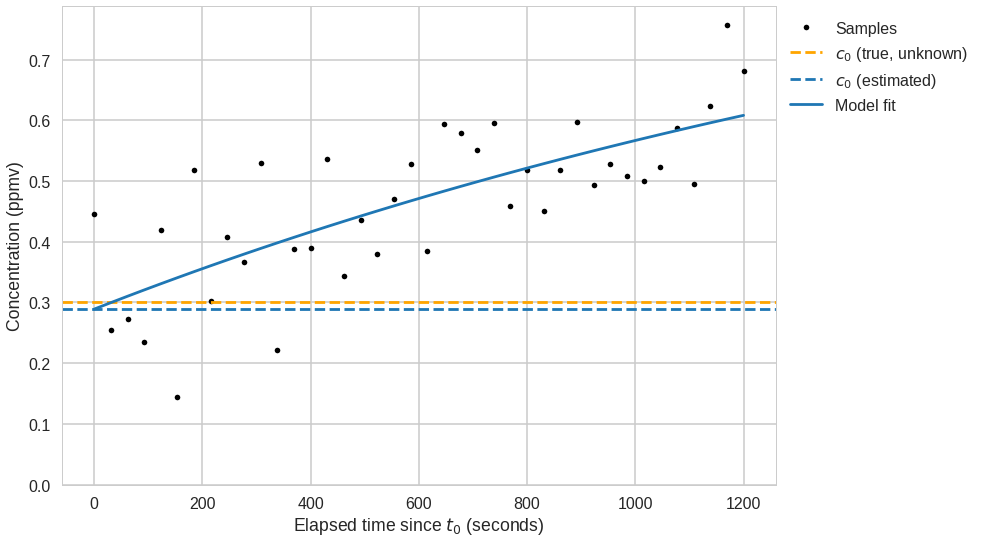

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import scipy.stats

np.random.seed(1)  # manual random seed to reproduce the same results

plt.style.use("seaborn-whitegrid")
plt.style.use("seaborn-poster")

# Some known parameters

P = 101325  # constant pressure 1 bar
T = 293  # 20 degrees C in K

V = 35 * 1e-3  # 20 liters in cubic meters
A = 0.25  # 0.25 square meters
Q = 1 * 1e-3 / 60  # 1 liters per minute in cubic meters per second
tau = V / Q
h = V / A

R = 8.314  # ideal gas constant in SI units


# The unknown flux to be found
F_molar_true = 0.002  # 0.005 micromoles per square meter per second
F_volumetric_true = F_molar_true * R * T / P

c0_true = 0.3  # volumetric concentration in ppmv; need not be known


# Generate simulated data

closure_time = 20 * 60  # 20 minutes in seconds
sampling_interval = 30  # seconds between samples
n_samples = int(closure_time / sampling_interval)

noise_level = c0_true * 0.3  # standard deviation of samples expressed as share of c0

t = np.linspace(0, closure_time, num=n_samples)  # sampling times, starting at zero
c_true = c0_true + F_volumetric_true * tau / h * (1 - np.exp(-t / tau))
c_measured = c_true + np.random.normal(0, noise_level, size=t.shape)


# Perform the regression.
# Assume to begin with that tau, h and t0 are perfectly known.

g = tau / h * (1 - np.exp(-t / tau))
regression_results = scipy.stats.linregress(g, c_measured)
F_volumetric_estimated = regression_results.slope
c0_volumetric_estimated = regression_results.intercept

# Use the volumetric estimate to calculate the model fit line
c_estimates = c0_volumetric_estimated + F_volumetric_estimated * g


# Finally plot everything

fig, ax = plt.subplots()
ax.plot(t, c_measured, color="k", marker=".", lw=0, label="Samples")
ax.axhline(c0_true, ls="--", label="$c_0$ (true, unknown)", color="orange")
ax.axhline(c0_volumetric_estimated, ls="--", label="$c_0$ (estimated)")
ax.plot(t, c_estimates, label="Model fit")
ax.set_ylim(0)
ax.set_xlabel("Elapsed time since $t_0$ (seconds)")
ax.set_ylabel("Concentration (ppmv)")
ax.legend(bbox_to_anchor=(1, 1))


## Check that the flux estimates are correct on average

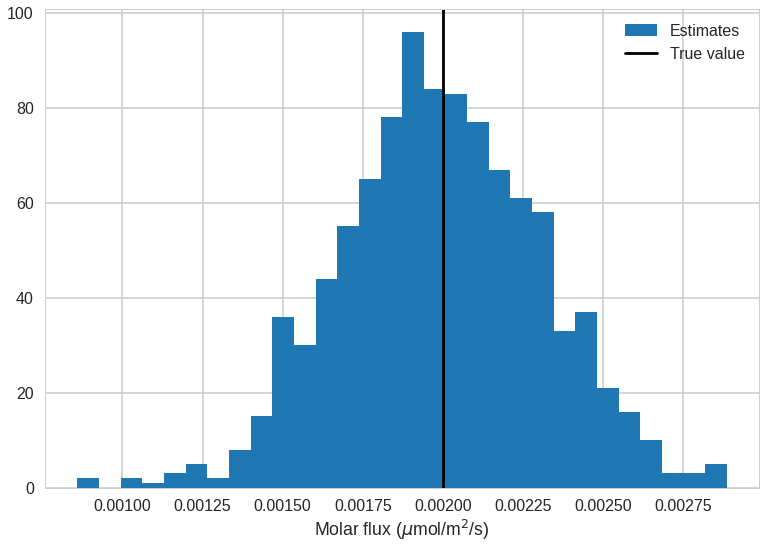

In [4]:
# Run 1000 simulations and compare the flux estimates to the true value


def estimate_molar_flux():
    c_measured = c_true + np.random.normal(0, noise_level, size=t.shape)
    g = tau / h * (1 - np.exp(-t / tau))
    regression_results = scipy.stats.linregress(g, c_measured)
    F_volumetric_estimated = regression_results.slope
    F_molar_estimated = F_volumetric_estimated * P / (R * T)
    return F_molar_estimated


F_molar_estimates = [estimate_molar_flux() for _ in range(1000)]

fig, ax = plt.subplots()
ax.hist(F_molar_estimates, bins=30, label="Estimates")
ax.axvline(F_molar_true, color="k", label="True value")
ax.set_xlabel(r"Molar flux ($\mu$mol/m$^2$/s)")
ax.legend()


## Investigate how flux estimates respond to an error in parameter values

Almost certainly, we will have some errors in our values of $A$, $V$, $t_0$, and so on. How do these errors affect the flux estimates? A simple way to investigate is through simulation.

Text(0.5, 0.98, 'Changes in flux estimate when introducing error in parameters')

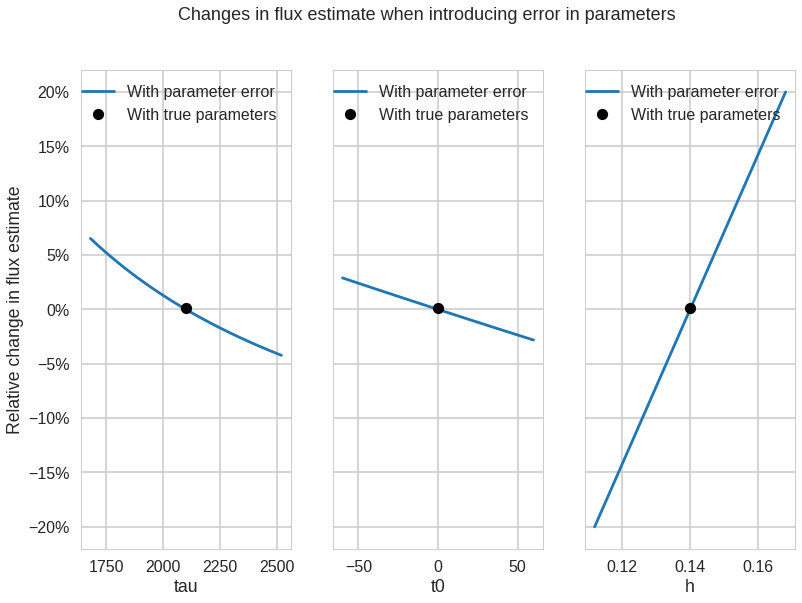

In [5]:
# Generate simulated data
c_measured = c_true + np.random.normal(0, noise_level, size=t.shape)


def estimate_molar_flux_with_parameter_errors(tau, h, t0):
    g = tau / h * (1 - np.exp(-(t - t0) / tau))
    regression_results = scipy.stats.linregress(g, c_measured)
    F_volumetric_estimated = regression_results.slope
    F_molar_estimated = F_volumetric_estimated * P / (R * T)
    return F_molar_estimated


error_sizes = {
    "tau": tau * 0.2,  # defined in relative terms
    "t0": 60,  # defined in absolute terms (seconds)
    "h": h * 0.2,  # defined in relative terms
}

true_values = {
    "tau": tau,
    "t0": 0,
    "h": h,
}

central_estimate = estimate_molar_flux_with_parameter_errors(**true_values)


fig, axs = plt.subplots(ncols=len(error_sizes), sharey=True)
for param_name, ax in zip(error_sizes, axs):
    error_terms = error_sizes[param_name] * np.linspace(-1, 1)
    param_values = true_values[param_name] + error_terms
    estimates = [
        estimate_molar_flux_with_parameter_errors(**{**true_values, param_name: v})
        for v in param_values
    ]
    rel_estimation_change = np.array(estimates) / central_estimate - 1

    ax.plot(param_values, rel_estimation_change, label="With parameter error")
    ax.plot(
        [true_values[param_name]],
        [central_estimate],
        marker="o",
        lw=0,
        color="k",
        label="With true parameters",
    )
    ax.legend()
    ax.set_xlabel(param_name)
    ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1, decimals=0))

axs[0].set_ylabel("Relative change in flux estimate")

fig.suptitle(
    "Changes in flux estimate when introducing error in parameters",
    fontsize=18,
)
